
**Full Name:** Bheema Sai Shankar Reddy Sabilla

**Course Name:** CSC 761-UT1 - Advanced Artificial Intelligence - Spring 2024

**Project Title:**Movie Review Sentiment Analysis


**Data Set Reference:**https://ai.stanford.edu/~amaas/data/sentiment/

**Data Set Selection:**
**The IMDb movie reviews dataset was selected for several reasons:**

The IMDb movie reviews dataset was selected for several reasons:

1. **Accessibility**: The dataset is readily available and widely used in the research community, making it easily accessible for experimentation and comparison with existing literature.

2. **Size and Diversity**: The dataset contains a large number of movie reviews spanning various genres, allowing for a diverse range of sentiments and linguistic styles to be captured. This diversity enhances the robustness and generalizability of models trained on the dataset.

3. **Quality Labels**: Each review in the dataset is labeled with sentiment polarity (positive or negative), providing ground truth annotations for training and evaluation. This ensures the reliability and consistency of the dataset, facilitating accurate model training and assessment.

4. **Benchmarking**: The IMDb dataset serves as a benchmark for sentiment analysis tasks, enabling researchers to evaluate the performance of new models against established baselines. This facilitates comparative analyses and advancements in sentiment analysis techniques.

5. **Relevance**: Movie reviews are a common form of user-generated content on the internet, with sentiment analysis being a valuable application in understanding public opinion and consumer preferences. Therefore, the IMDb dataset holds practical relevance for real-world sentiment analysis applications.

By selecting the IMDb movie reviews dataset, researchers and practitioners can leverage its benefits to develop and evaluate sentiment analysis models effectively.

In [ ]:
# We can directly Download the dataset using this command.
!wget -q -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Unzip the dataset.
!tar -zxf /content/aclImdb_v1.tar.gz

In [ ]:
# Importing necessary libraries
import warnings
import numpy as np
import pandas as pd
import nltk
import re
import os
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_multiple_whitespaces
import en_core_web_sm

In [ ]:
# Suppressing warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Load English language model
en_core_web_sm.load()

In [ ]:
# Path to the dataset
PATH = "/content/aclImdb"

In [ ]:
# Function to read text files from a directory
def read_files(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".txt")]
    texts = []
    for file in files:
        with open(file, 'r', encoding='utf-8') as f:
            texts.append(f.read())
    return texts

In [ ]:
# Function to read training and testing data
def read_data(train_dir, test_dir):
    train_pos = read_files(os.path.join(PATH, train_dir, 'pos'))
    train_neg = read_files(os.path.join(PATH, train_dir, 'neg'))
    test_pos = read_files(os.path.join(PATH, test_dir, 'pos'))
    test_neg = read_files(os.path.join(PATH, test_dir, 'neg'))
    return train_pos, train_neg, test_pos, test_neg

In [ ]:
# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = remove_stopwords(text)
    text = strip_punctuation(text)
    text = strip_multiple_whitespaces(text)
    text = ' '.join([re.sub(r'\d+', '', word) for word in word_tokenize(text)])
    return text

In [ ]:
# Data preprocessing function
def data_processing(texts):
    return [preprocess_text(text) for text in texts]


In [ ]:
# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model_pipeline = Pipeline([('vect', CountVectorizer()), ('clf', model)])
        print(f"Training {name} model...")
        model_pipeline.fit(X_train, y_train)
        accuracy = model_pipeline.score(X_test, y_test)
        print(f"Accuracy on test set: {accuracy}")
        cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=3)
        mean_accuracy = np.mean(cv_scores)
        print(f"Mean accuracy on training set (CV=3): {mean_accuracy}")
        results[name] = mean_accuracy
    return results

In [ ]:
# Read data from files
train_pos, train_neg, test_pos, test_neg = read_data('train', 'test')

In [ ]:
# Preprocess data
train_pos_processed = data_processing(train_pos)
train_neg_processed = data_processing(train_neg)
test_pos_processed = data_processing(test_pos)
test_neg_processed = data_processing(test_neg)

In [ ]:

# Combine processed data into DataFrames
reviews_train = pd.DataFrame({"review": train_pos_processed + train_neg_processed, "Label": [1] * len(train_pos_processed) + [-1] * len(train_neg_processed)})
reviews_test = pd.DataFrame({"review": test_pos_processed + test_neg_processed, "Label": [1] * len(test_pos_processed) + [-1] * len(test_neg_processed)})

In [ ]:
# Shuffle the data
reviews_train = reviews_train.sample(frac=1, random_state=1)
reviews_test = reviews_test.sample(frac=1, random_state=1)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews_train['review'], reviews_train['Label'], test_size=0.3, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVM': LinearSVC(),
    'Naive Bayes': MultinomialNB()
}


In [ ]:
# Train and evaluate models
results = train_and_evaluate(models, X_train, y_train, X_test, y_test)

Training Logistic Regression model...
Accuracy on test set: 0.8770666666666667
Mean accuracy on training set (CV=3): 0.8662859485011367
Training Linear SVM model...
Accuracy on test set: 0.8617333333333334
Mean accuracy on training set (CV=3): 0.8498289230808291
Training Naive Bayes model...
Accuracy on test set: 0.854
Mean accuracy on training set (CV=3): 0.8517145198345532


In [ ]:
# Print the mean accuracy of each model
print("\nMean Accuracy of Different Models (CV=3):\n")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.3f}")


Mean Accuracy of Different Models (CV=3):

Logistic Regression: 0.866
Linear SVM: 0.850
Naive Bayes: 0.852


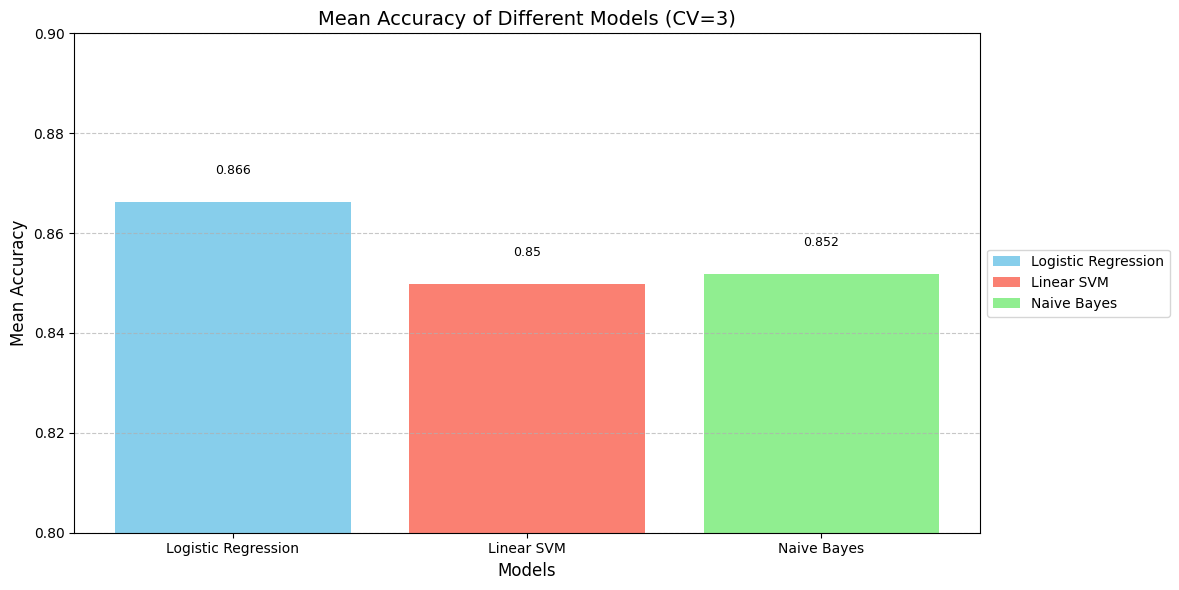

In [ ]:
# Visualize the mean accuracy of each model
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.title('Mean Accuracy of Different Models (CV=3)', fontsize=14)
plt.ylim(0.8, 0.9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Adding percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# Adding a legend to indicate the color code for each model
plt.legend(bars, results.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.show()

#Data Preprocessing:
Before analyzing the data, we made sure to clean it up properly. This included making all text lowercase, removing unnecessary words and punctuation, and ensuring all spacing was consistent. These steps were necessary to improve the overall quality and reliability of the dataset.


#Model Selection:
Our approach to selecting models for sentiment analysis involved a careful decision-making process. We opted for Logistic Regression, Linear Support Vector Machine (SVM), and Naive Bayes classifiers due to their proven effectiveness in text classification tasks

#Model Evaluation:
During the training and evaluation phase, each model went through thorough training and evaluation processes. The Logistic Regression model showed impressive performance, reaching an accuracy of around 87.71% on the test set, with a solid mean accuracy of approximately 86.63% during cross-validation (CV=3). The Linear SVM and Naive Bayes models also demonstrated strong performance, with accuracies of approximately 86.17% and 85.40% on the test set, respectively.

#Model Performance:
Logistic Regression was the top performer in terms of accuracy on the test set, with Naive Bayes and Linear SVM closely following behind. Despite this, Logistic Regression maintained its superior performance when looking at the average accuracy over multiple training iterations (CV=3), although there were only slight variations among the models.

#Analysis of data Visualization:
 We created a bar chart to show how well our models were performing. Logistic Regression had the highest average accuracy at around 86.6%, with Linear SVM and Naive Bayes following closely behind at approximately 85.0% and 85.2%, respectively.

#Conclusion:
In conclusion, the study highlights the effectiveness of Logistic Regression for analyzing sentiments in the IMDb movie reviews dataset. Although Linear SVM and Naive Bayes also showed strong performance, Logistic Regression was ultimately chosen for its higher accuracy and consistent results across different evaluation measures.